<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Using TensorFlow Keras, Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn.

This is your "Hello World!" of TensorFlow.

### Example TensorFlow Starter Code

```python 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(3, activation='sigmoid', input_dim=2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

results = model.fit(X,y, epochs=100)

```

### Additional Written Tasks:
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

In [2]:
import numpy as np
import seaborn as sns
data = np.array([
     [0,0,1,0]
    ,[0,1,1,1]
    ,[1,0,1,1]
    ,[0,1,0,1]
    ,[1,0,0,1]
    ,[1,1,1,0]
    ,[0,0,0,0]])

In [3]:
X = data[:,0:3]
X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 1, 1],
       [0, 0, 0]])

In [4]:
y = data[:,0]
y

array([0, 0, 1, 0, 1, 1, 0])

In [5]:
##### Your Code Here #####
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(3, activation='sigmoid', input_dim=3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

results = model.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8155 - acc: 0.4286
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8144 - acc: 0.4286
Epoch 3/1000
1/1 [==============================] - 0s 995us/step - loss: 0.8132 - acc: 0.4286
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.8121 - acc: 0.4286
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8109 - acc: 0.4286
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8098 - acc: 0.4286
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8087 - acc: 0.4286
Epoch 8/1000
1/1 [==============================] - 0s 996us/step - loss: 0.8076 - acc: 0.4286
Epoch 9/1000
1/1 [==============================] - 0s 996us/step - loss: 0.8065 - acc: 0.4286
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.8054 - acc: 0.4286
Epoch 11/1000
1/1 [==============================] - 0s 3ms/ste

In [6]:
results.history.keys()

dict_keys(['loss', 'acc'])

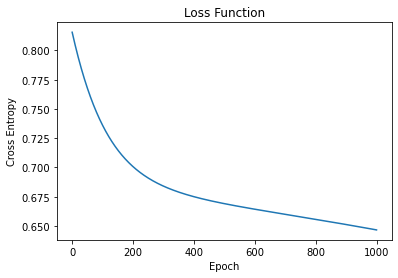

In [7]:
ax = sns.lineplot(x = [i for i in range(len(results.history['loss']))], y = results.history['loss'])

ax.set_title('Loss Function')
ax.set_xlabel('Epoch')
ax.set_ylabel('Cross Entropy');

#results.history['loss']
#results.history['acc']

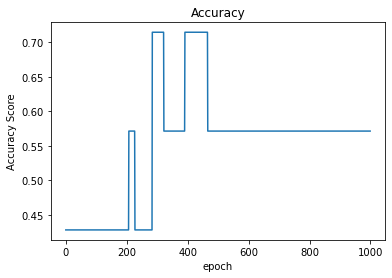

In [8]:
ax = sns.lineplot(x = [i for i in range(len(results.history['loss']))], y = results.history['acc'])

ax.set_title('Accuracy')
ax.set_xlabel('epoch')
ax.set_ylabel('Accuracy Score');

### Build a Tensor Keras Perceptron

Try to match the architecture we used on Monday - inputs nodes and one output node. Apply this architecture to the XOR-ish dataset above. 

After fitting your model answer these questions: 

Are you able to achieve the same results as a bigger architecture from the first part of the assignment? Why is this disparity the case? What properties of the XOR dataset would cause this disparity? 

Now extrapolate this behavior on a much larger dataset in terms of features. What kind of architecture decisions could we make to avoid the problems the XOR dataset presents at scale? 

*Note:* The bias term is baked in by default in the Dense layer.

In [9]:
### Compare 

perceptron = Sequential([
    Dense(1, activation='sigmoid', input_dim=3)
])

perceptron.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

p_results = perceptron.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 997us/step - loss: 0.9914 - acc: 0.5714
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.9894 - acc: 0.4286
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.9875 - acc: 0.4286
Epoch 4/1000
1/1 [==============================] - 0s 998us/step - loss: 0.9855 - acc: 0.4286
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.9835 - acc: 0.4286
Epoch 6/1000
1/1 [==============================] - 0s 998us/step - loss: 0.9816 - acc: 0.4286
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.9796 - acc: 0.4286
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.9777 - acc: 0.4286
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.9757 - acc: 0.4286
Epoch 10/1000
1/1 [==============================] - 0s 994us/step - loss: 0.9738 - acc: 0.4286
Epoch 11/1000
1/1 [==============================] - 0s 998us

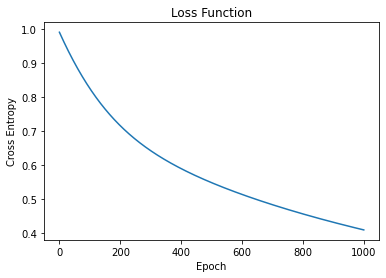

In [10]:
ax = sns.lineplot(x = [i for i in range(len(p_results.history['loss']))], y = p_results.history['loss'])

ax.set_title('Loss Function')
ax.set_xlabel('Epoch')
ax.set_ylabel('Cross Entropy');


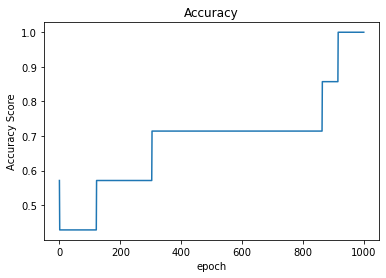

In [11]:
ax = sns.lineplot(x = [i for i in range(len(p_results.history['loss']))], y = p_results.history['acc'])

ax.set_title('Accuracy')
ax.set_xlabel('epoch')
ax.set_ylabel('Accuracy Score');

In [12]:
perceptron.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
p_results

## Try building/training a more complex MLP on a bigger dataset.

Use TensorFlow Keras & the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the canonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the Internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


### Parts
1. Gathering & Transforming the Data
2. Making MNIST a Binary Problem
3. Estimating your Neural Network (the part you focus on)

### Gathering the Data 

`keras` has a handy method to pull the mnist dataset for you. You'll notice that each observation is a 28x28 arrary which represents an image. Although most Neural Network frameworks can handle higher dimensional data, that is more overhead than necessary for us. We need to flatten the image to one long row which will be 784 values (28X28). Basically, you will be appending each row to one another to make on really long row. 

In [13]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [14]:
# input image dimensions
img_rows, img_cols = 28, 28

In [15]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [16]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [17]:
# Now the data should be in a format you're more familiar with
x_train.shape

(60000, 784)

In [18]:
# Look at our first picture
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
# What number does the image show?
y_train[0]

5

### Making MNIST a Binary Problem 
MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simplify the problem for now: Zero or all else.

In [20]:
import numpy as np

y_temp = np.zeros(y_train.shape)
y_temp[np.where(y_train == 0.0)[0]] = 1
y_train = y_temp

y_temp = np.zeros(y_test.shape)
y_temp[np.where(y_test == 0.0)[0]] = 1
y_test = y_temp

In [21]:
# A Nice Binary target for ya to work with
y_train

array([0., 1., 0., ..., 0., 0., 0.])

In [22]:
# Let's look at the distribution of our classes
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([54077,  5923], dtype=int64))

### Estimating Your `net

In [23]:
##### Your Code Here #####

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.metrics import Precision, Recall

imager = Sequential([
    Dense(3, activation='sigmoid', input_dim=784),
    Dense(1, activation='sigmoid')
])

# since we have about a 10/90 split for our class (only 10% of numbers are zeroes), we'd get 90% accuracy by rejecting all numbers
# use recall as our metric so we don't get fooled if our model rejects every number (abundance of false negatives)
imager.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', Recall()])

imager_results = imager.fit(x_train, y_train, epochs=50, verbose = 1)

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1443 - acc: 0.9733 - recall: 0.7547
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0469 - acc: 0.9912 - recall: 0.9482
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0324 - acc: 0.9922 - recall: 0.9556
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0270 - acc: 0.9926 - recall: 0.9585
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0240 - acc: 0.9931 - recall: 0.9593
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0222 - acc: 0.9937 - recall: 0.9627
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0209 - acc: 0.9942 - recall: 0.9654
Epoch 8/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0197 - acc: 0.9945 - recall: 0.9676
Epoch 9/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0188 - acc

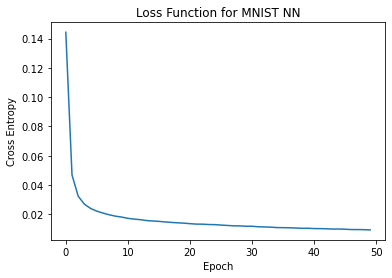

In [24]:
ax = sns.lineplot(x = [i for i in range(len(imager_results.history['loss']))], y = imager_results.history['loss'])

ax.set_title('Loss Function for MNIST NN')
ax.set_xlabel('Epoch')
ax.set_ylabel('Cross Entropy');


In [25]:
ax = sns.lineplot(x = [i for i in range(len(imager_results.history['acc']))], y = imager_results.history['recall_4'])

ax.set_title('Recall for MNIST NN')
ax.set_xlabel('Epoch')
ax.set_ylabel('Recall');


KeyError: 'recall_4'

In [ ]:
imager_results.history.keys()

In [ ]:
test_results = imager.evaluate(x_test, y_test, verbose=0)

print("Loss:\t", test_results[0])
print("Accuracy:", test_results[1])
print("Recall:\t", test_results[2])

## Stretch Goals: 

- Make MNIST a multiclass problem using cross entropy & soft-max
- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?